<h1 align=center> EE6132 PROGRAMMING ASSIGNMENT 2 </h1>

In [1]:
# Chceking for prerequisites

!pip3 install numpy
!pip3 install opencv-python
!pip3 install statistics
!pip3 install matplotlib
!pip3 install scikit-image

In [2]:
# IMPORTS

# For array manipulation
import numpy as np
# For plotting
import matplotlib.pyplot as plt
# For median calculation
import statistics
# Using plot style - "ggplot"
plt.style.use('ggplot')

# For loading in images
# I could not get load_image() (in helpers.py) to work, don't know why.
# So, I am using opencv for loading and resizing images. 
import cv2

<h2 align=center> FILTERING </h2>

In [3]:
# Declaring k = {0,1,2,3....15} and X = 3 + sin(2*pi*k/15)
K = np.arange(16, dtype=int)
X = 3 + np.sin(2*np.pi*K/15)

- **Declaring utility functions**

In [4]:
def get_Val(X, t):
    """
        Utility Function to get a value from signal X at time 't'

        INPUTS : The signal X (of size 15) and time instant 't'
        OUTPUT : The signal intensity at time 't' 
    """

    if t >= 0 and t < 16:
        # Returning the value for t in [0,16)
        return X[t]

    # The signal is zero otherwise
    return 0


def conv_1D(X, H):
    """
        Utility Function to compute the 1D convolution of two signals.

        INPUTS : Two signals X and H, both numpy arrays.
        OUTPUT : The 1D Convolution of X and H under "same" mode. 

        I did not implement the other two modes as we have no need for them.
    """

    # Inverting H for implementing convolution. Recall how 1D convolution is done.
    # The second signal is inverted and then slid over the first signal to compute the output.
    H = H[::-1]
    # Calculating the padding width as floor(len(H))/2
    pad_width = len(H)//2

    # Declaring the output array
    Y = np.zeros(len(X))
    # Padding X both sides with width = pad_width
    X_pad = np.pad(X, (pad_width, pad_width))
    # Performing the convolution with proper bounds
    for i in range(pad_width, len(X)+pad_width):
        """
            In case you are not familiar with python array slicing, to obtain the 
            sub-array [X[i-1],X[i],X[i+1]], we slice the array as X[i-1:i+2].
            i.e to go from index (i-1) -> (i+1), we write X[i-1:i+2]

            np.multiply() is used to multiply two equal length sequences element-wise.
            np.sum() computes the sum of the sequence. 
        """
        # NOTE : Index of Y is subtracted by pad_width so that Y is indexed properly
        Y[i - pad_width] = np.sum(np.multiply(X_pad[i - pad_width: i + pad_width + 1], H))

    # Returning the convolution output
    return Y


def plot(X, Y, title, annotate=True):
    """
        Utility Function to plot X and Y for k={0,1,2,3....15}

        INPUTS : The signals X,Y and the plot title.
        PLOTS  : The signals X and Y wrt k.
    """
    # Setting a default figsize
    plt.figure(figsize=(8, 5))

    # Plotting X and Y wrt k
    plt.plot(K, X, linestyle='-', color='c', marker='o', mfc='k', label='X')
    plt.plot(K, Y, linestyle='-', color='r', marker='o', mfc='k', label='Y')
    plt.legend()

    # Checking for the annotation flag
    if annotate:
        for k, x, y in zip(K, X, Y):

            # Generating x and y labels
            label_x = "{:.2f}".format(x)
            label_y = "{:.2f}".format(y)

            # Annotating the plots with X and Y values for more detailed visualization
            plt.annotate(label_x,  # this is the text
                         (k, x),  # this is the point to label
                         textcoords="offset points",  # position the text
                         xytext=(0, -15),  # distance from text to points (x,y)
                         ha='center')  # horizontal alignment set to center

            plt.annotate(label_y, (k, y), textcoords="offset points",
                         xytext=(0, 11), ha='center')

    # Setting the title
    plt.title(title), plt.show()

- **I have chosen not to annotate some plots because they MASK the plots.**
- If required to check individual values, please set annotate = **True** in the corresponding function call.

<h3 align=center> FILTER 1 </h3>

- $y_k = x_{k+1} - x_k$ for this case. Note that edge cases are taken care of by the `get_Val()`utility function.

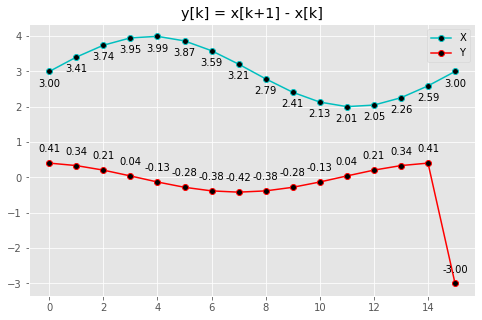

In [5]:
def filter1(X):
    """
        Wrapper function to apply filter 1 : y[k] = x[k+1] - x[k] 
        
        INPUTS : The input signal X.
        OUTPUTS : The filtered output signal Y.
    """
    # Declaring Y of size len(X) = 16.
    Y = np.zeros(len(X))
    # Iterating over the input X
    for i in range(len(X)):
        # The x[k] values are obtained using the get_Val() utility fn to cover edge cases.
        Y[i] = get_Val(X, i+1)-get_Val(X, i)
    # Returning the filtered output
    return Y

# Getting the system output
Y1 = filter1(X)
# Plotting the input X and the output Y
plot(X, Y1, 'y[k] = x[k+1] - x[k]')

- Since $y_k$ depends on $x_{k+1}$ and $x_k$, if X shifts by **T** then Y shifts by the same amount. 
- The operation is linear since the operation is **homogeneous and additive**.
- Hence, the operation is **linear and space-invariant (LSI)**.

- Since the above operation is **LSI**, we can perform the same using a convolution process.
- This needs an appropriate convolution filter, so lets take a look at $y_k$ again.
\begin{align} y_k = x_{k+1} - x_k \end{align}
This can be expressed as - 
\begin{align} 
    y_k = [x_{k-1},x_k, x_{k+1}]  \odot [0,-1,1]
\end{align}
- NOTE : I am using $\odot$ to denote **dot-product** between two vectors. 
- It can be seen that $y_k$ can also be expressed as $y_k = [x_{k},x_{k+1}] \odot [-1,1]$. The reason I am not considering this operation for convolution is because **the size of the kernel for a convolution operation is usually kept odd** to maintain symmetrical padding for "same" mode.
- Hence, the smallest convolution filter is [0,-1,1] inverted, i.e $[1,-1,0]$ because we invert the second signal before the 1D convolution of two signals.

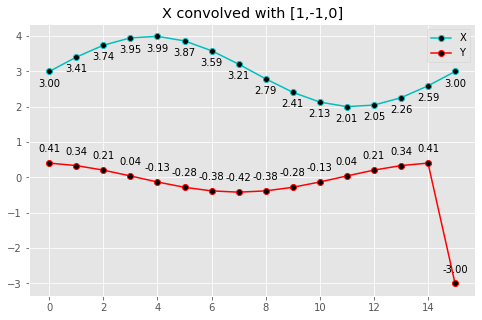

In [6]:
# The convolution filter to be used here is [1,-1,0] as explained above.

# Calling the 1D Convolution function declared before
Y1_conv = conv_1D(X,[1,-1,0])
# Plotting the convolution output
plot(X, Y1_conv, 'X convolved with [1,-1,0]')

- **NOTE** : The result is same as the direct process.

<h3 align=center> FILTER 2 </h3>

- In this case, $y_k$ is expressed as $x_k - \bar{X}$, where $\bar{X} = \frac{1}{L+1} \sum_{i=0}^{L} x_i$. 
- **NOTE:** I am considering **L to be 15** here since we have only **16 data points** for k = {0,1,2....15}.
- So to compute the mean of the sequence X, L = 15 seems right.

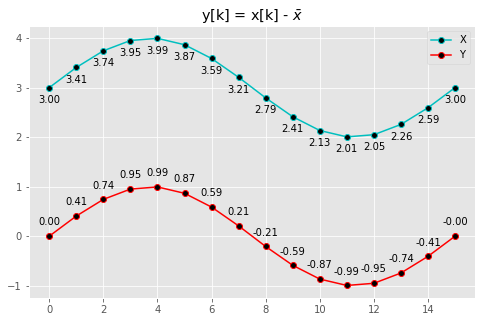

In [7]:
def filter2(X):
    """
        Wrapper function to apply filter 2 : y[k] = x[k] - X_mean 
        
        INPUTS : The input signal X.
        OUTPUTS : The filtered output signal.
    """
    # np.sum() is used to sum the array and len() is used to get the value of L
    # This basically computes the mean of the sequence
    X_mean = np.sum(X)/len(X)
    
    # Returning the filtered output
    return X - X_mean

# Getting the system output
Y2 = filter2(X)
# Plotting the input X and the output Y
plot(X, Y2, r'y[k] = x[k] - $\bar{x}$')

- Since Y depends on the mean of the first 16 time instants, if X shifts by **T** then the new Y will not match the earlier Y shifted by **T**. 
- The operation is linear since it is **homogeneous and additive**.
- Hence, the operation is **linear but not space-invariant**.
- So, we cannot implement a convolution process in this case.

<h3 align=center> FILTER 3 </h3>

- $y_k = median(\{x_l : l \in [k-2,k+2]\})$ for this case. 
- The median is calculated using the **statistics** library.

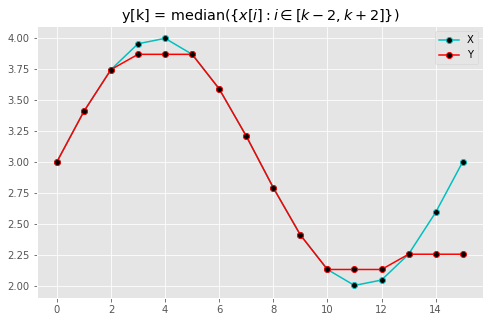

In [8]:
def filter3(X):
    """
        Wrapper function to apply filter 3 : y[k] = median({x[i]: i in [k-2,k+2]})
        
        INPUTS : The input signal X.
        OUTPUTS : The filtered output signal Y.
    """
    
    # Declaring Y of size len(X) = 16.
    Y = np.zeros(len(X))
    
    # Iterating over the input X
    for i in range(len(X)):
        """
            I am using the median() library function to compute the median
            of the subarray [X[i-2],X[i-1],X[i],X[i+1],X[i+2]] below (in case
            you are not familiar with array slicing and list comprehension).
        """
        Y[i] = statistics.median([get_Val(X, l) for l in range(i-2, i+3)])
            
    # Returning the filtered output
    return Y

# Getting the system output
Y3 = filter3(X)
# Plotting the input X and the output Y
# As mentioned before, I have set annotate to False because the annotations mask the plots.
plot(X, Y3, r'y[k] = median({$x[i] : i \in [k-2,k+2]$})', annotate = False)

- Since $y = median(\{x_l : l \in [k-2,k+2]\})$ , and the median operation violates the additivity property of 
linearity, the system is non-linear
- But if X shifts by **T** then Y is shifted by **T** too. 
- Hence, the operation is **non-linear and space-invariant**.
- We cannot implement a convolution process in this case.

<h3 align=center> FILTER 4 </h3>

- In this case, $y_k$ is expressed as:
\begin{align}
    y_k = x_{k+0.5} - x_{k-0.5}
\end{align}
- By applying linear interpolation to calculate the neighboring samples to obtain signal values such as $x_{k+0.5}$ and $x_{k-0.5}$, we get : 
\begin{align}
    x_{k+0.5} = \frac{x_{k+1}+x_k}{2}
\end{align} \
\begin{align}
    x_{k-0.5} = \frac{x_k+x_{k-1}}{2}
\end{align}
- Substituting $x_{k+0.5}$ and $x_{k-0.5}$, we get : 
\begin{align} \\y_k = \frac{(x_{k+1}+x_k)-(x_k+x_{k-1})}{2}
\end{align}\
\begin{align}
    \implies y_k = \frac{x_{k+1}-x_{k-1}}{2}
\end{align}

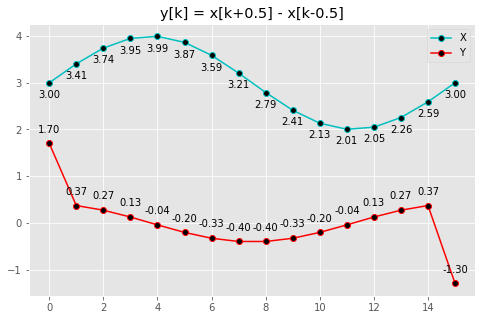

In [9]:
def filter4(X):
    """
        Wrapper function to apply filter 4 : y[k] = (x[k+1]-x[k-1])/2

        INPUTS : The input signal X.
        OUTPUTS : The filtered output signal Y.
    """

    # Declaring Y of size len(X) = 16.
    Y = np.zeros(len(X))

    # Iterating over the input X
    for i in range(len(X)):
        # Computing y[k]
        Y[i] = (get_Val(X, i+1)-get_Val(X, i-1))/2

    # Returning the filtered output
    return Y

# Getting the system output
Y4 = filter4(X)
# Plotting the input X and the output Y
plot(X, Y4, r'y[k] = x[k+0.5] - x[k-0.5]')

- $y_k$ is expressed as $\frac{x_{k+1}-x_{k-1}}{2} \implies y_k$ depends on $x_{k+1}$ and $x_{k-1}$.
- So, if X shifts by **T** then Y shifts by the same amount. 
- The operation is linear since it is **homogeneous and additive**.
- Hence, the operation is **linear and space-invariant**.

- Since this operation is **LSI**, we can also obtain the same result using a convolution process.
- To obtain the appropriate convolution filter, we take a look at the final expression for $y_k$ again.
\begin{align} y_k = \frac{x_{k+1} - x_{k-1}}{2}\end{align}
This can also be expressed by - 
\begin{align} 
    y_k = [x_{k-1},x_k, x_{k+1}]  \odot [-0.5,0,0.5]
\end{align}
- Note that the kernel size is odd in this case and there is no smaller expression for $y_k$.
- This means that the smallest convolution filter is [-0.5,0,0.5] inverted, i.e $[0.5,0,-0.5]$ for the same reason as before.

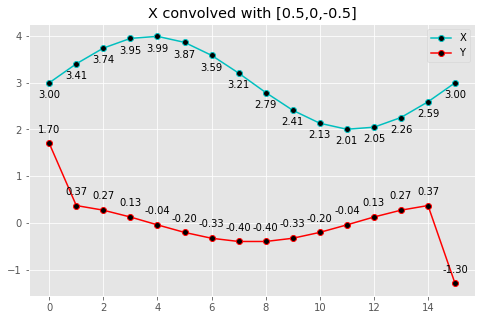

In [10]:
# The convolution filter to be used here is [0.5,0,-0.5].

# Calling the 1D Convolution function
Y4_conv = conv_1D(X, [0.5, 0, -0.5])
# Plotting the convolution output
plot(X, Y4_conv, 'X convolved with [0.5,0,-0.5]')

- **NOTE** : The result in this case is the same as the direct process too.

<h3 align=center> FILTER 5 </h3>

- This case is pretty much the same as before, but now :
\begin{align}
    y_k = |x_{k+0.5}-x_{k-0.5}|
\end{align}
- Substituting $x_{k+0.5}$ and $x_{k-0.5}$ from before, we get : 
\begin{align} \\y_k = \frac{|(x_{k+1}+x_k)-(x_k+x_{k-1})|}{2}
\end{align}\
\begin{align}
    \implies y_k = \frac{|x_{k+1}-x_{k-1}|}{2}
\end{align}


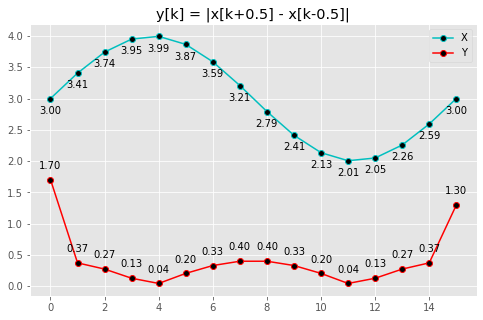

In [11]:
# Similarly here, just take abs()

def filter5(X):
    """
        Wrapper function to apply filter 5 : y[k] = abs(x[k+1]-x[k-1])/2

        INPUTS : The input signal X.
        OUTPUTS : The filtered output signal Y.
    """

    # Declaring Y of size len(X) = 16.
    Y = np.zeros(len(X))

    # Iterating over the input X
    for i in range(len(X)):
        # Computing y[k]
        Y[i] = abs((get_Val(X, i+1)-get_Val(X, i-1)))/2
    
    # Returning the filtered output
    return Y

# Getting the system output
Y5 = filter5(X)
# Plotting the input X and the output Y
plot(X, Y5, r'y[k] = |x[k+0.5] - x[k-0.5]|')

- $y_k = \frac{x_{k+1}-x_{k-1}}{2} \implies y[k]$ depends on the absolute values of $x_{k+1}$ and $x_{k-1}$.
- So, if X shifts by **T** then Y shifts by the same amount. 
- But, the absolute value operation is **non-linear** since it **violates the additivity property**.
- Hence, the operation is **non-linear and space-invariant**.
- So, we cannot implement a convolution process in this case.

<h3 align=center> FILTER 6 </h3>

- In this case : 
\begin{align} y_k = \frac{1}{5} \sum_{i=k-2}^{k+2} x_i \end{align}
- We expand this and write:
\begin{align}
    y_k = \frac{x_{k-2} + x_{k-1} + x_k + x_{k+1} + x_{k+2}}{5}
\end{align}

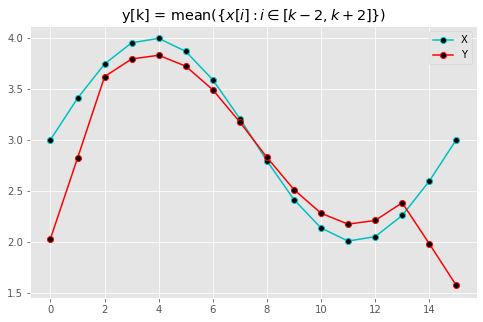

In [12]:
def filter6(X):
    """
        Wrapper function to apply filter 6 : y[k] = (x[k-2]+x[k-1]+x[k]+x[k+1]+x[k+2])/5

        INPUTS : The input signal X.
        OUTPUTS : The filtered output signal Y.
    """

    # Declaring Y of size len(X) = 16.
    Y = np.zeros(len(X))

    # Iterating over the input X
    for i in range(len(X)):
        # Computing mean
        Y[i] = statistics.mean([get_Val(X, l) for l in range(i-2, i+3)])
    
    # Returning the filtered output        
    return Y


# Getting the system output
Y6 = filter6(X)
# Plotting the input X and the output Y
# Again annotate is set to False for the aforementioned reason
plot(X, Y6, r'y[k] = mean({$x[i] : i \in [k-2,k+2]$})', annotate = False)

- Note that $y_k$ depends on the mean of the neighborhood (of size 4) of $x_k$, so if X shifts by **T** then Y shifts by the same amount. 
- The operation is linear since the averaging operation is **homogeneous and additive**.
- Hence, the operation is **linear and space-invariant**.

- Since the operation is **LSI**, we can similarly obtain the same result using a convolution process.
- To obtain the convolution filter, we look at the final expression for $y_k$ again.
\begin{align} y_k = \frac{x_{k-2} + x_{k-1} + x_{k} + x_{k+1} + x_{k+2}}{5}\end{align}
This could also be expressed as - 
\begin{align} 
    y_k = [x_{k-2}, x_{k-1}, x_{k}, x_{k+1}, x_{k+2}]  \odot [0.2,0.2,0.2,0.2,0.2].
\end{align}
- In this case too, the kernel size is odd and there is no smaller representation of $y_k$.
- This implies that the smallest convolution filter is [0.2,0.2,0.2,0.2,0.2] inverted, which is the same as the filter is symmetrical.

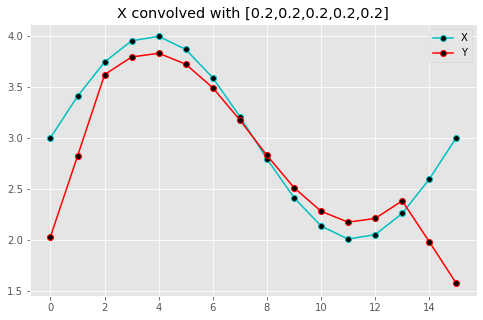

In [13]:
# The convolution filter to be used here is [0.2,0.2,0.2,0.2,0.2]. Check report for full explanation.

# Calling the 1D Convolution function
Y6_conv = conv_1D(X, [0.2, 0.2, 0.2, 0.2, 0.2])
# Plotting the convolution output
plot(X, Y6_conv, 'X convolved with [0.2,0.2,0.2,0.2,0.2]', annotate = False)

- **NOTE** : This result is also same as the direct process similar to the cases above.
- By now, we can conclude based on obervation that the operations which are LSI could be implemented via a convolution process. 
- Actually, the reverse holds true too, i.e. if an operation can be implemented via a convolution process, then it is LSI.

<h2 align=center> FILTERING IN THE FOURIER SPACE </h2>

- We saw above that filtering operations that are linear and space-invariant can be represented as a convolutional operation. 
- So we attempt to use the Fourier property of convolutions to efficiently implement the filter in the Fourier domain.
- We seek to do this for Filters 1,4 and 6 (i.e. a, d and f in the PA2 pdf)

<h3 align=center> FILTER 1 </h3>

- Here, if you **directly compute the Fourier Transform of X and the filter `H = [1,-1,0]` using a size of `len(X) = 16`, the output will be incorrect**.
- Let me show the output obtained by the above process and the correct output below for better understanding. 

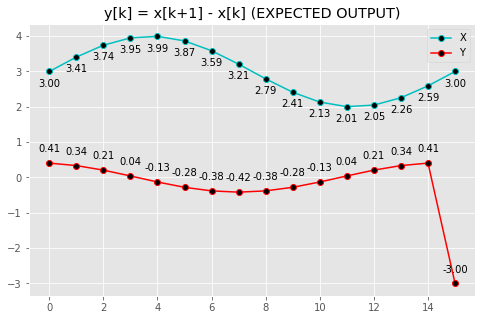

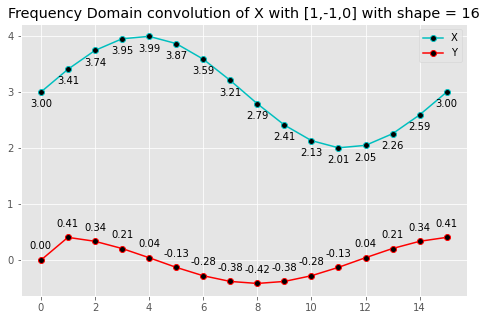

In [14]:
H1 = [1, -1, 0]
shape1 = len(X)
# Calculating Fourier transforms of X and H with shape = len(X) = 16
F_X1 = np.fft.fft(X, shape1)
F_H1 = np.fft.fft(H1, shape1)

"""
    np.fft.ifft() computes the Inverse Fourier Transform to obtain Y.
    np.multiply() 
"""
Y_fft_1 = np.fft.ifft(np.multiply(F_X1, F_H1), shape1)

# Plotting the output for the Frequency Domain Convolution with shape = len(X) = 16.
# NOTE : I am also plotting the direct computation output for ease of comparison
plot(X, Y1, r'y[k] = x[k+1] - x[k] (EXPECTED OUTPUT)')

# Plotting the output for the Frequency Domain Convolution
""" 
    np.real() outputs only the real parts of a complex input array. 
    Note that matplotlib generates a warning if you use a complex array directly for plotting.
"""
plot(X, np.real(Y_fft_1),
     'Frequency Domain convolution of X with [1,-1,0] with shape = 16')

- It is evident that the outputs do not match. To rectify this, a padding of width $floor\left(\frac{length(H)}{2}\right)$ is added to len(X) for getting the correct shape for the FT.
- The shape in the case padding is added is `shape = len(X) + 2*padding_width`. If this is used, the convolution in the frequency domain gives the correct output.
- But also note that the output is now of shape `len(X) + 2*padding_width` which has some extra data points. To mitigate this, **sub-arrays of length padding_width** are clipped from both the ends of the output of the Inverse Fourier Transform, which gives an output shape of `len(X)` as required.

- I have implemented these changes in the code below. Let's see if this works$.$  

**To sum up, changes in the code for correcting the Frequency Domain Convolution Process are:**
- `pad_width = floor(len(H)/2)` where $H = [1,-1,0] \implies len(H) = 3 \implies pad\_width = 1$ in this case.
- **Shape of the FT** should be `len(X) + 2 * pad_width = 16 + 2*1 = 18`.
- **Y** should be truncated to a shape of `len(X) = 16` for "same" mode output.

**IMPORTANT NOTE** : 
- We **need not explicitly pad X** for getting FT of shape `len(X) + 2 * pad_width`. 
- It is **enough to just set the shape of the output** in `np.fft.fft()` to `len(X) + 2 * pad_width` and  the **function takes care of the padding for us**. 
- Similarly for Inverse FT, setting the output width to `len(X) + 2 * pad_width` and then removing the extra padding works.
- Please check the code to understand better.

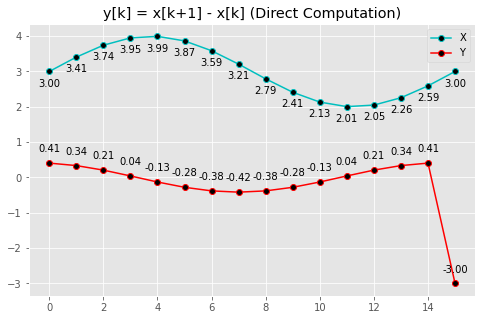

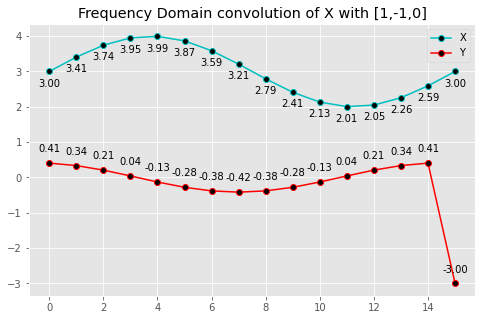

In [15]:
H1 = [1, -1, 0]

# Calculating the padding width for truncation of Y
pad_width1 = len(H1)//2
# Calculating the Fourier transform shape for Filter 1
shape1 = len(X) + 2 * pad_width1

# Calculating Fourier transforms of X and H
F_X1 = np.fft.fft(X, shape1)
F_H1 = np.fft.fft(H1, shape1)

# Taking only 16 timesteps for the "same" mode output by removing the padding
Y_fft_1 = np.fft.ifft(np.multiply(F_X1, F_H1), shape1)[pad_width1:-pad_width1]

# Plotting the output for the Frequency Domain Convolution
# NOTE : I am also plotting the direct computation output for ease of comparison
plot(X, Y1, r'y[k] = x[k+1] - x[k] (Direct Computation)')

# Plotting the output for the Frequency Domain Convolution
"""
   Note that np.real() outputs only the real parts of a complex input array.
   Matplotlib gives a warning if you use complex values directly.
"""
plot(X, np.real(Y_fft_1), 'Frequency Domain convolution of X with [1,-1,0]')

- We can observe that **the results do match in this case**. Let us compute the convolution using the same process for the remaining LSI Filters and re-verify this in the end.

<h3 align=center> FILTER 4 </h3>

- In this case, $H = [0.5, 0, -0.5] \implies len(H) = 3 \implies pad\_width = floor\left(\frac{length(H)}{2}\right) = 1$ in this case.
- **Shape of the FT** should be `len(X) + 2 * pad_width = 16 + 2*1 = 18`.
- Again, **Y** should be truncated to a shape of `len(X) = 16` for "same" mode output.

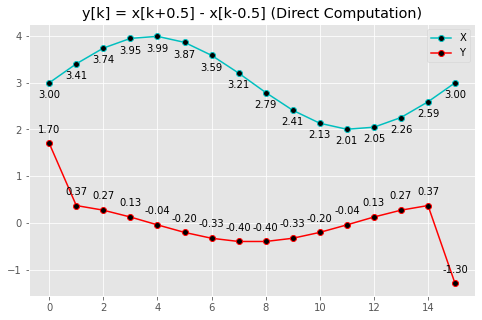

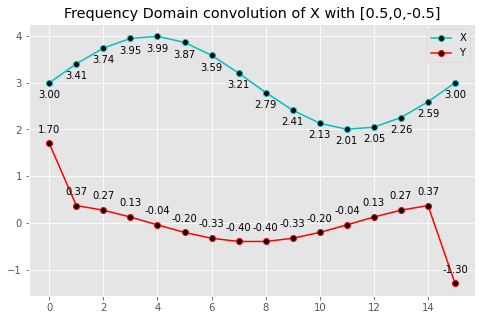

In [16]:
H4 = [0.5, 0, -0.5]

# Calculating the padding width for truncation of Y
pad_width4 = len(H4)//2
# Calculating the Fourier transform shape for Filter 4
shape4 = len(X) + 2 * pad_width4

# Calculating Fourier transforms of X and H
F_X4 = np.fft.fft(X, shape4)
F_H4 = np.fft.fft(H4, shape4)

# Taking only 16 timesteps for the "same" mode output by removing the padding
Y_fft_4 = np.fft.ifft(np.multiply(F_X4, F_H4), shape4)[pad_width4:-pad_width4]

# NOTE : I am also plotting the direct computation output for ease of comparison
plot(X, Y4, r'y[k] = x[k+0.5] - x[k-0.5] (Direct Computation)')

# Plotting the output for the Frequency Domain Convolution (same as above)
plot(X, np.real(Y_fft_4),'Frequency Domain convolution of X with [0.5,0,-0.5]')

- **The results of the direct and FFT convolutions match**

<h3 align=center> FILTER 6 </h3>

- $H = [0.2,0.2,0.2,0.2,0.2]  \implies len(H) = 5 \implies pad\_width = floor\left(\frac{length(H)}{2}\right) = 2$ in this case.
- **Shape of the FT** should be `len(X) + 2 * pad_width = 16 + 2*2 = 20`.
- Yet again, **Y** should be truncated to a shape of `len(X) = 16` for "same" mode output.

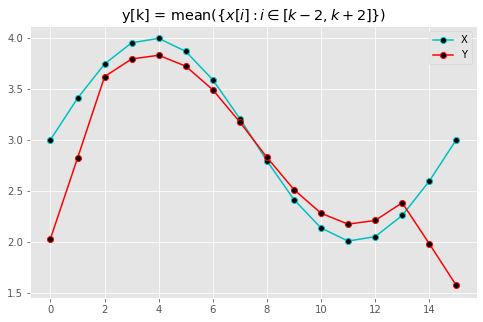

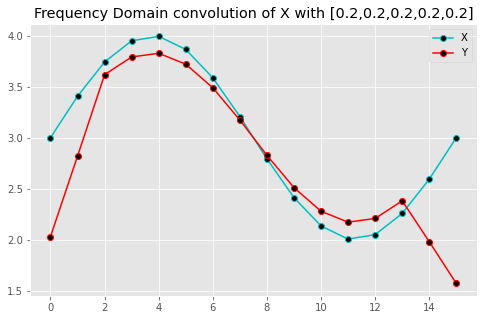

In [17]:
H6 = [0.2, 0.2, 0.2, 0.2, 0.2]

# Calculating the padding width for truncation of Y
pad_width6 = len(H6)//2
# Calculating the Fourier transform shape for Filter 6
shape6 = len(X) + 2 * pad_width6

# Calculating Fourier transforms of X and H
F_X6 = np.fft.fft(X, shape6)
F_H6 = np.fft.fft(H6, shape6)

# Calculating the padding width for truncation of Y
pad_width6 = len(H6)//2
# Taking only 16 timesteps for the "same" mode output
Y_fft_6 = np.fft.ifft(np.multiply(F_X6, F_H6), shape6)[pad_width6:-pad_width6]

# NOTE : I am also plotting the direct computation output for ease of comparison
plot(X, Y6, r'y[k] = mean({$x[i] : i \in [k-2,k+2]$})',annotate=False)

# Plotting the output for the FFT convolution (same as above)
plot(X, np.real(Y_fft_6),'Frequency Domain convolution of X with [0.2,0.2,0.2,0.2,0.2]',annotate=False)

- **The results of the direct and FFT convolutions match**
- **Thus, it is experimentally verified that the results of the frequency domain convolution match the earlier time domain convolution outputs.** 

<h2 align=center>  HYBRID IMAGES </h2>

<h3 align=center> Implementing my_filter( ) for image filtering  </h3>

- **Image padding** is implemented in `conv_2D()`.
- `my_filter()` accepts any arbitrary filter kernel. If the filter has an even dimension, then a ValueError is raised.
- The **"same" mode convolution** is taken care of by `conv_2D()`.
- `my_filter()` **supports filtering of both grayscale and color images**. For convolution of color images, I separated the color channels, filtered them separately and then put them back together. 
- Basically, I used `conv_2D()` as a convolution utility function for `my_filter()`.

In [18]:
def conv_2D(image, kernel, k_size, mirror_xy=False):
    """
        Utility function to compute the 2D convolution of an image with a kernel.

        INPUTS : 
                image  : A 2D image (this could be a single channel of 
                         a color image or a grayscale image),
                kernel : A convolution filter,
                k_size : The kernel size (odd integer),
                mirror_xy : A flag for taking the mirror image of the kernel wrt 
                           the x and y axes in succession as in convolution theory.  

        OUTPUT : The filtered image.

        NOTE : All exceptions are handled by the my_filter() function below.
    """

    """
        NOTE : This code snippet is used for taking the mirror image wrt x and y axes.
        Usually this is not required since kernels are usually symmetrical wrt x and y mirroring.
        Practically, this is rarely used but I'm just implementing it just in case.
        Set mirror_xy to "True" to use this.
    """
    if mirror_xy:
        kernel = [row[::-1] for row in kernel][::-1]

    # Storing image shape for later use
    h, w = image.shape
    # The padding size is floor(k_size/2) for "same" mode convolution operation
    # The "//" operator is used to perform integer division (similar to "/" in C++)
    n_pad = k_size//2

    # Padding the input image, setting the datatype to unsigned 8-bit
    padded = np.zeros((h+2*n_pad, w+2*n_pad), dtype=np.uint8)
    # Storing the image pixels in the padded image
    padded[n_pad:-n_pad, n_pad:-n_pad] = image

    # Declaring array for storing output image
    conv_img = np.zeros((h, w))

    # Iterating though the image pixels
    # We do not need to compute anything for the padding as the output mode is "same"
    for i in range(n_pad, h+n_pad):
        for j in range(n_pad, w+n_pad):

            # Storing the current patch for convolution
            # NOTE : I have explained array slicing before, please have a look if you are new to it.
            patch = padded[i-n_pad:i+n_pad+1, j-n_pad:j+n_pad+1]

            """
                Performing the convolution operation and storing in the output image
                As mentioned before np.multiply is used for element-wise multiplication
                np.sum() without any parameter settings just sums up all the values in a matrix
            """
            # Setting the pixel value to convolution output
            conv_img[i-n_pad, j-n_pad] = np.sum(np.multiply(kernel, patch))

    """
        np.clip(array, min, max) sets any values below min and above max to min and max respectively. 
        This is used to get rid of any outliers (both negative and positive values above 255).
        The below line of code clips the convolution output to [0,255].
    """
    conv_img = np.clip(conv_img, 0, 255)

    # Returning the output image
    return conv_img


def my_filter(image, kernel, mirror_xy=False):
    """
        Function to apply the given filter(kernel) to the input image (handles both color and grayscale).

        INPUTS : The image, the kernel and a mirror_xy flag for taking the mirror image of 
                 the kernel wrt the x and y axes in succession as in convolution theory.

        OUTPUT : The filtered output image.

        This also handles some exceptions for 2D convolution (like even kernel size).
    """

    # Storing the kernel sizes for checking and further use
    k_h, k_w = kernel.shape

    # Raising an exception if the kernel is not a square matrix
    if k_h != k_w:
        raise ValueError(
            f"The kernel must have equal width and height (square matrix), not of shape '{k_h} x {k_w}'!")
    else:
        # Raising an exception if the kernel size is even
        if k_h % 2 == 0:
            raise ValueError(
                f"The kernel size should be an odd number. {k_h} is not odd!")

    # Handling the edge case of a "1 x 1" filter
    if k_h == 1:
        return image*kernel[0][0]

    # Checking to see if the image is in grayscale
    if len(image.shape) == 2:
        # Storing and returning the filtered output. Note that mirror_xy is set to False by default.
        return conv_2D(image, kernel, k_h)

    # Checking to see if the image is in color.
    elif len(image.shape) == 3:
        """
            In case the input image is in color, we need to perform a convolution for each of the 3 channels. 
            The filtered channel images are then stacked depth wise (along the third axis) using np.dstack() 
            to give the final output.
        """
        conv_clr = np.dstack((conv_2D(image[..., 0], kernel, k_h),
                              conv_2D(image[..., 1], kernel, k_h),
                              conv_2D(image[..., 2], kernel, k_h)))

        # Making the output image datatype unsigned 8-bit just in case outliers still exist
        conv_clr = np.array(conv_clr, dtype=np.uint8)

        # Returning the filtered color image
        return conv_clr

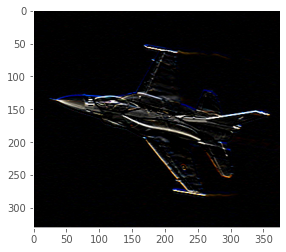

In [19]:
# I used this code snippet to check the output of my_filter()
# Uncomment if necessary

# Gy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
# img = cv2.imread('./data/ex02/plane.bmp')
# conv = my_filter(img, Gy)
# plt.imshow(conv[:,:,::-1])
# plt.grid()

<h3 align=center> Function to generate a Gaussian kernel of given $\sigma$  </h3>

In [20]:
def normal_density(x, mu, sd):
    """
        Function to calculate the pixel density wrt the Univariate Normal Distribution.

        INPUTS : Takes in an array, the mean(mu) and the stddev(sigma) of the Normal Distribution.
        OUTPUT : Returns the gaussian pixel density of the input array.

    """
    return 1/(np.sqrt(2*np.pi)*sd)*pow(np.e, (-pow((x-mu)/sd, 2)/2))


def gen_Gaussian(k_size=9, sigma=1.5, verbose=False):
    """
        Function to generate a gaussian filter of given size and stddev(sigma).

        INPUTS : Takes in the kernel size(odd integer), the gaussian stddev sigma(float) 
                 and a verbose flag to toggle the display of the gaussian filter.
        OUTPUT : Returns the gaussian kernel of given shape.

    """

    # Creating a 1D Kernel for calculating gaussian density
    kernel = np.array(range(-(k_size//2), k_size//2+1))
    # Calculating the gaussian density of the kernel
    kernel = normal_density(kernel, 0, sigma)
    # Taking the outer product of the 1D-Kernel to get a 2D-Kernel
    kernel = np.outer(kernel, kernel)
    # Normalizing the 2D-kernel
    kernel /= np.sum(kernel)
    # Checking for verbose flag
    if verbose:
        # Plotting the 2D-kernel for clarity (if verbose is set)
        plt.imshow(kernel, cmap='gray'), plt.grid()
        plt.title(f"{k_size}x{k_size} GAUSSIAN FILTER"), plt.show()

    # Returning the gaussian kernel of shape (k_size, k_size)
    return kernel

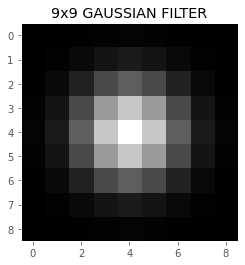

In [21]:
# I used this code snippet to visualize the returned gaussian kernel
# Uncomment it if necessary

# kernel = gen_Gaussian(sigma = np.sqrt(2), verbose = True)

<h3 align=center> Implementing the functions for lowpass and highpass filtering </h3>

- To perform **lowpass filtering**, we need to blur the image with an appropriate gaussian filter kernel. Gaussian blurring is implemented in `gaussian_Blur()`.
- We then perform lowpass filtering. This is implemented in `low_pass()`.
- Highpass filtering is done by **removing the low frequencies** from the image. To get the high frequencies, **blur the image with a gaussian first to extract the low frequency components and then subtract them from the input image** to get the highpass output. This is implemented in `high_pass()`.

In [22]:
# To perform lowpass filtering, we need a gaussian blurring function.
def gaussian_Blur(img, sigma=1.5, verbose=False):
    """
        Function to return the gaussian blurred image given the input image, filter size and stddev(sigma).

        INPUTS : Takes in a grayscale image(2D-Array), k_size(int) the kernel size, 
                 sigma(float), the gaussian stddev and a verbose flag.

        OUTPUT : Returns the gaussian blurred output.
    """

    # Setting the size of the gaussian kernel as floor(6*sigma+1).
    k_size = int(6 * sigma + 1)
    # Making the kernel size odd if it is not
    if not k_size % 2:
        k_size += 1

    # Getting the kernel
    kernel = gen_Gaussian(k_size, sigma, verbose)

    # Blurring the image. mirror_xy is not requiured here as the gaussian kernel is symmetric
    blur = my_filter(img, kernel)

    # Returning the gaussian blur
    return blur

def low_pass(image, sigma):
    
    """
        Function to generate the lowpass response of the input image.
        
        INPUTS : The input image and sigma, the cutoff frequency (or the gaussian stddev)
        OUTPUT : The lowpass response
        
        NOTE : This function handles both grayscale and color images.
    """
    # Gaussian blurring the image and dividing by 255 to normalize it.
    lo = gaussian_Blur(image, sigma)/255
    
    # As I mentioned before, np.clip(array, min, max) is used to clip arrays 
    # to closed interval [min,max]. Here min = 0 and max = 1
    lo = np.clip(lo, 0, 1)
    
    # Returning the lowpass response
    return lo

def high_pass(image, sigma):
    
    """
        Function to generate the highpass response of the input image.
        
        INPUTS : The input image and sigma, the cutoff frequency (or the gaussian stddev)
        OUTPUT : The highpass response
        
        NOTE : This also function handles both grayscale and color images.
    """
    # Removing the low frequencies from the image and normalizing it.
    high = (image / 255) - gaussian_Blur(image, sigma)/255
    
    # Adding 0.5 and clipping the response to [0,1]. 
    high = np.clip(high+0.5, 0, 1)
    
    # Returning the highpass response
    return high

- `IMPORTANT NOTE` : I have used the notation `img[:,:,::-1]` to plot all color images. This just inverts the color channels in the image, i.e. if the image is in `BGR` format, this converts the image to `RGB` format. In case you do not understand why this is required, read ahead. 

- Opencv, or `cv2.imread()` reads in the input image in `BGR` format. But matplotlib, or `plt.imshow()` shows(plots) the image output in `RGB` format.

- So to view the right output, I have inverted the color channels. Comment out the array slicing operation to check the above for yourself if required.

- Implementing the utility function for plotting `BGR` images in `RGB` format
- This will be useful later

In [23]:
def plot_image(image):
    """
        Utility Function to help plot BGR images in RGB format.
        
        INPUT : An image in BGR format.
        PLOTS : The image in RGB format.
    """
    plt.imshow(image[:,:,::-1]), plt.grid()
    plt.show()

- Let us check the behavior of `lowpass()` and `highpass()`

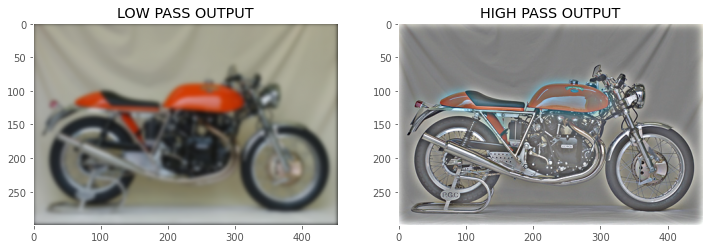

In [24]:
# Loading in the image
img = cv2.imread('./data/ex01/motorcycle.bmp')

# This is used to set the figure size to (12,5)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
# Getting the lowpass output
lowpass = low_pass(img, sigma=3)
plt.imshow(lowpass[:, :, ::-1])
plt.title('LOW PASS OUTPUT')
plt.grid()

plt.subplot(1,2,2)
# Getting the highpass output
highpass = high_pass(img, sigma=7)
plt.imshow(highpass[:, :, ::-1])
plt.title('HIGH PASS OUTPUT')
plt.grid()

plt.show()

<h3 align=center> Generating the hybrid image </h3>

In [25]:
def gen_Hybrid(img1, img2, sigma1=2, sigma2=2):
    """
        Function to generate a hybrid image of two images.

        INPUTS : 
                img1 : The image to take the low-pass response.
                img2 : The image to take the high-pass response.
                sigma1 : The standard deviation of the gaussian kernel (cutoff frequency) for img1
                sigma2 : The standard deviation of the gaussian kernel (cutoff frequency) for img2

        OUTPUT : The hybrid of img1 (low pass) and img2 (high_pass)
    """
    
    # Declaring variables to hold the final image size
    h, w = 0, 0
    
    # Printing the input image shapes for clarity
    print(f"Input image shapes\n\n -> Image 1 : {img1.shape}\n -> Image 2 : {img2.shape}")
    
    # If the inputs are of unequal size, then ...
    if img1.shape != img2.shape:
        # Setting the final image size to the average of the input sizes
        h, w = (img1.shape[0]+img2.shape[0])//2, (img1.shape[1]+img2.shape[1])//2
        
        """ 
            Resizing the images to the required size
            
            NOTE : cv2.resize() actually processes image shape in the form of (width, height); 
                   Not in the form of (height, width) as in numpy.
        """
        img1 = cv2.resize(img1, (w, h))
        img2 = cv2.resize(img2, (w, h))
    
     # Printing the output image shape for clarity
    print(f"\nOutput image shape : {img1.shape}")
    
    print("\nGenerating the hybrid image...")
    # Performing low pass filtering and storing in low
    low = low_pass(img1, sigma1)
    
    # Performing high pass filtering and storing in high
    high = high_pass(img2, sigma2)

    # NOTE : We do not need to normalize the output as the division by 2 
    #        takes care of it for us as low and high are already normalized. 
    
    return (low + high)/2

- **Defining some utility functions to help in the implementation.**

In [26]:
def plot_input(input1, input2):
    """
        Utility Function to help plot input BGR images in RGB format.
        
        INPUT : Two input images in BGR format.
        PLOTS : The inputs in RGB format.
    """
    plt.figure(figsize=(12,5))
    
    # Plotting the input images
    plt.subplot(1,2,1)
    plt.imshow(input1[:,:,::-1]), plt.grid()
    
    plt.subplot(1,2,2)
    plt.imshow(input2[:,:,::-1]), plt.grid()
    
    plt.show()
    
def plot_Downsample(hybrid):
    """
        Utility Function to help plot the progressively downsampled images.
        
        INPUT : The hybrid image.
        PLOTS : The progressively downsampled images for visualization.
    """
    # Importing the visualization function
    from helpers import vis_hybrid_image
    
    # Getting the output image
    op = vis_hybrid_image(hybrid)
    # Plotting the output
    plt.figure(figsize=(15, 5))
    plt.imshow(op), plt.grid()
    plt.show()

<h3 align=center> Output visualization using successive downsampling  </h3>

**Before going into the hybrid image visualization, let me elucidate a few things :**

`1) What is downsampling?`
- Downsampling (by a factor of `N`) is a process by which we drop `N-1` image pixels for every pixel retained in both the height and width dimension. `N` is a hyperparameter here. 
- The width and height of the downsampled image are **N** times smaller than the input. 
- We (or rather `helpers.py`) use(s) `N = 2` to perform downsampling. 
- **NOTE :**  We use `sklearn.transform.rescale()` to downsample the image which uses an adaptive interpolation technique to help mitigate the effect of aliasing (even if anti-aliasing is turned off).


`2) What is progressive downsampling?`
- Progressive downsampling is the process of downsampling an image `k-1` times in succession (basically the output of one downsampling operation becomes the input for the next). 
- We end up with a total of `k` images at the end of the process (including the input). Again, `k` is a hyperparameter. 
- We use `k = 5` to perform progressive downsampling.

`3) Why perform progressive downsampling?`
- Progressive downsampling successively **removes high frequency components** of the frequency content of the signal for every downsampling operation. 
- The **lower frequency components are largely preserved during downsampling**. Every **successor has a larger fraction of lower frequency components than it's predecessor**.
- We can clearly observe this pattern emerge in the examples ahead.

`4) Why is higher frequency removed during downsampling?`
- Downsampling **gets rid of the finer details of the image** since we pick only one out of `N` pixels. If interpolation is used to downsample, this effect is even more pronounced. The **finer details are represented by the higher frequencies**, so we essentially **remove the higher frequency components** during downsampling, only **preserving the the broader patterns, or the lower frequency components** of the input. 
- We can notice this effect in the examples ahead.

`5) How does this affect the visualization of the hybrid images at different resolutions?`
- For hybrid images, the **images at the start of the progressive downsampling process have a high percentage of higher frequency components**. The lower frequency components are also present but masked by finer details.
- We can observe that the **images in front closely resemble the second image** (the image whose high frequencies are added to the hybrid).  
- The **images towards the end of the progressive downsampling process have predominantly lower frequency components**. The **higher frequency components are continuously filtered out during every successive downsampling operation**.
- Hence the **images near the end closely resemble the first image** (the image whose low frequencies are added to the hybrid). 

<h4 align=center> TEST CASE 1 </h4>

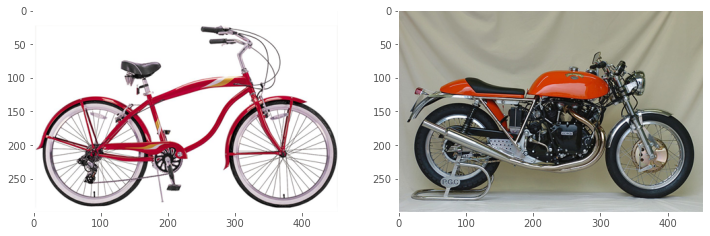

In [27]:
# Reading in the input for testcase 1
img1_1 = cv2.imread('./data/ex01/bicycle.bmp')
img1_2 = cv2.imread('./data/ex01/motorcycle.bmp')

plot_input(img1_1, img1_2)

**NOMENCLATURE :** 
- The image on the left in the above plot is Image1 and the one on the right is Image2. 
- I will be using this kind of nomenclature for all successive tests cases.
- For this case, `bicycle.bmp` is **Image1** and `motorcycle.bmp` is **Image2**.

**NOMENCLATURE :**
- When I write **hybrid image of Image1 and Image2**, I mean to say that we take the lowpass response of Image1 and the highpass response of Image2 for the hybrid. 
- Vice-versa for hybrid image of Image2 and Image2.

- Let us first generate the hybrid of Image1 and Image2.

Input image shapes

 -> Image 1 : (300, 453, 3)
 -> Image 2 : (300, 453, 3)

Output image shape : (300, 453, 3)

Generating the hybrid image...


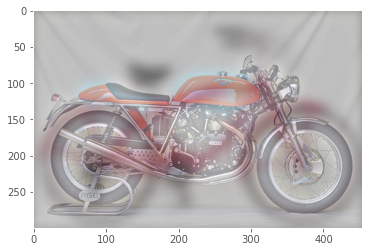

In [28]:
hybrid1_1 = gen_Hybrid(img1_1, img1_2, 8, 10)
plot_image(hybrid1_1)

- As I had mentioned before, the hybrid of Image1 and Image2 largely contains the finer details (higher frequency components) of Image2.
- But we can observe the lower frequency components of Image1 in the background but they are masked.
- This image when observed at a close distance resembles Image2 but from a large distance (say 6 feet) resembles Image1.

- Let us now generate the hybrid of Image2 and Image1

Input image shapes

 -> Image 1 : (300, 453, 3)
 -> Image 2 : (300, 453, 3)

Output image shape : (300, 453, 3)

Generating the hybrid image...


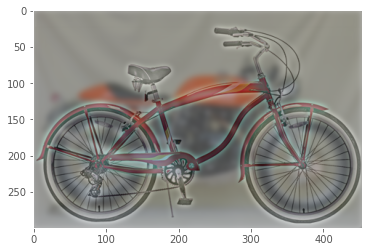

In [29]:
hybrid1_2 = gen_Hybrid(img1_2, img1_1, 4, 4)
plot_image(hybrid1_2)

- Again we can observe a similar pattern.
- The hybrid of Image2 and Image1 largely contains the finer details (higher frequency components) of Image1.
- We can again observe the lower frequency components of Image2 in the background but they are blurry.
- This image when observed at a close distance resembles Image1 but from a large distance resembles Image2.

- Let us now **progressively downsample the hybrid of Image1 and Image2** and visualize the process.

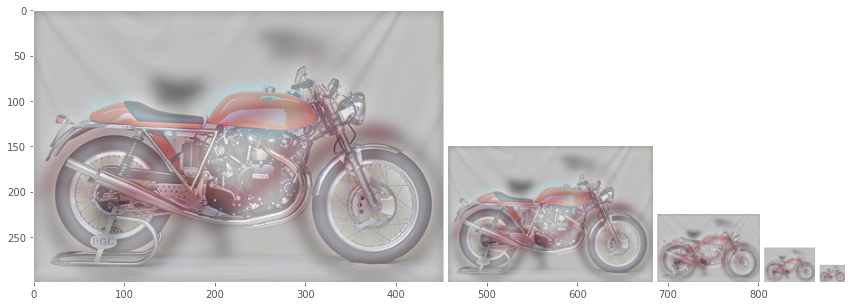

In [30]:
output = plot_Downsample(hybrid1_1[:,:,::-1])

- **IMPORTANT NOTE:** For the plots of progressively downsampled images, when I say the **third image/sample**, I mean to say the **third image/sample from the left** in the plot. Please recall this numbering pattern when you come across it going forward. I repeat, numbering is always from the left. 

- As I had explained before, the images closer to the front (the first and second images) contain the higher frequency components of Image2 and closely resemble Image2.
- But as we go further down the line, we can observe the shape of Image1 emerging around the third sample. 
- The fourth sample is almost completely identical to Image1 as all the high frequencies of Image2 are filtered out.
- This is the same pattern we encounter when we observe the image from varying distances.

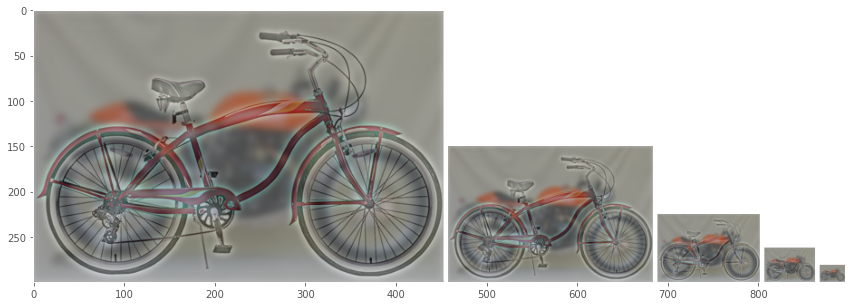

In [31]:
output = plot_Downsample(hybrid1_2[:,:,::-1])

- These images exhibit a similar pattern.
- Images closer to the front contain higher frequency components of Image1 and closely resemble Image1.
- But as we go further down the line, we can observe the shape of Image2 emerging around the third sample. 
- The fourth sample is completely identical to Image1 as all the high frequencies of Image2 are filtered out.

<h4 align=center> TEST CASE 2 </h4>

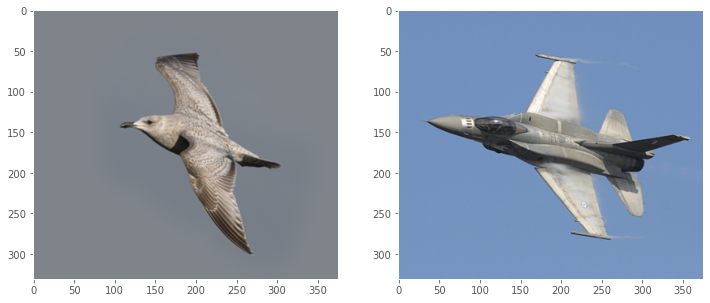

In [32]:
# Reading in the input for testcase 2
img2_1 = cv2.imread('./data/ex02/bird.bmp')
img2_2 = cv2.imread('./data/ex02/plane.bmp')

plot_input(img2_1, img2_2)

Input image shapes

 -> Image 1 : (331, 375, 3)
 -> Image 2 : (331, 375, 3)

Output image shape : (331, 375, 3)

Generating the hybrid image...


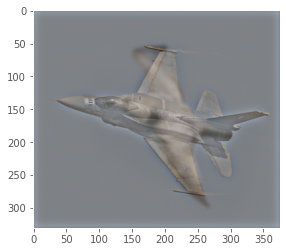

In [33]:
hybrid2_1 = gen_Hybrid(img2_1,img2_2, 2.5, 6.5)
plot_image(hybrid2_1)

- Similar to the earlier case, the hybrid of Image1 (the bird) and Image2 (the plane) largely contains the finer details (higher frequency components) of Image2.
- But we can again observe the lower frequency components of Image1 in the background.

Input image shapes

 -> Image 1 : (331, 375, 3)
 -> Image 2 : (331, 375, 3)

Output image shape : (331, 375, 3)

Generating the hybrid image...


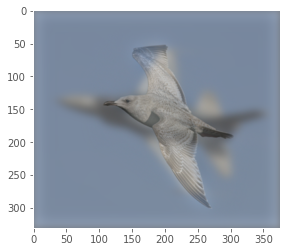

In [34]:
hybrid2_2 = gen_Hybrid(img2_2,img2_1, 6, 11)
plot_image(hybrid2_2)

- A similar pattern emerges again.
- But you can make out some blurred features of the plane (like its nose and tail) in the background. But the bird's features are prominent.

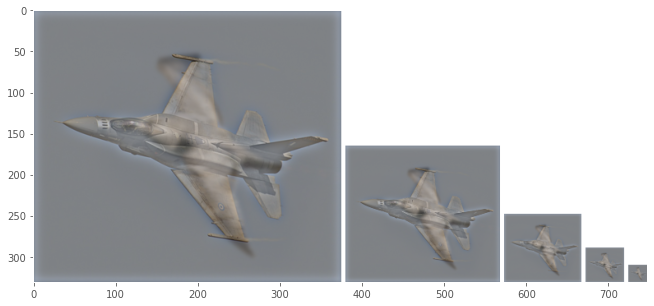

In [35]:
output = plot_Downsample(hybrid2_1[:,:,::-1])

- Similar to the case before, the images closer to the front (the first and second images) contain the higher frequency components of Image2 and closely resemble Image2.
- As we go further down the line, we can observe the shape of Image1 emerging around the third sample (like before). 
- The fourth sample is almost completely identical to Image1 as all the high frequencies of Image2 are filtered out. 
- But in contrast to before, some prominent features like the nose-cone of the plane can be made out if we dig deep.

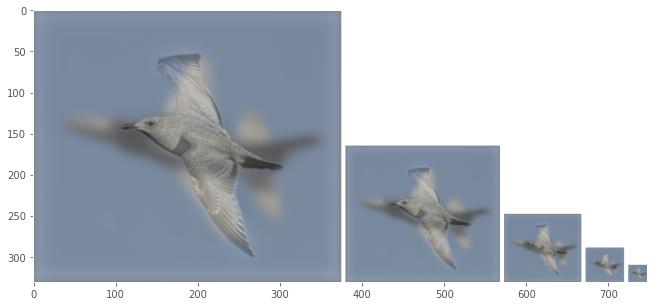

In [36]:
output = plot_Downsample(hybrid2_2[:,:,::-1])

- Sure enough, the images exhibit a similar pattern.
- Images closer to the front closely resembles the bird.
- But as we go further down the line, the shape of the plane emerges in the third sample. 
- The fourth sample is completely identical to Image1.

<h4 align=center> TEST CASE 3 </h4>

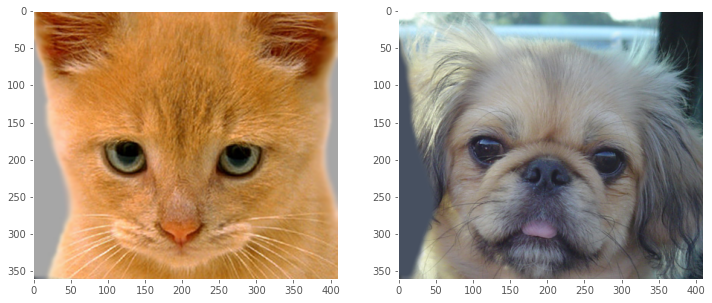

In [37]:
# Reading in the input for testcase 3
img3_1 = cv2.imread('./data/ex03/cat.bmp')
img3_2 = cv2.imread('./data/ex03/dog.bmp')

plot_input(img3_1, img3_2)

Input image shapes

 -> Image 1 : (361, 410, 3)
 -> Image 2 : (361, 410, 3)

Output image shape : (361, 410, 3)

Generating the hybrid image...


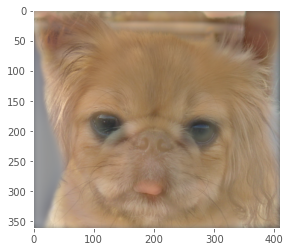

In [38]:
hybrid3_1 = gen_Hybrid(img3_1,img3_2, 5, 14)
plot_image(hybrid3_1)

- Like we had seen before, the hybrid of Image1 (the kitten) and Image2 (the dog) largely contains the finer details (higher frequency components) of Image2.
- But we can again observe some components of Image1 (like the whiskers of the kitten) in the background.

Input image shapes

 -> Image 1 : (361, 410, 3)
 -> Image 2 : (361, 410, 3)

Output image shape : (361, 410, 3)

Generating the hybrid image...


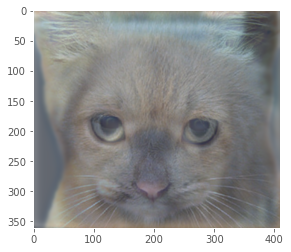

In [39]:
hybrid3_2 = gen_Hybrid(img3_2,img3_1, 4, 8)
plot_image(hybrid3_2)

- This completely resembles a kitten as the images are oriented properly (i.e. their predominant features are centered close-by) and the kitten's features are more dominant than the dog's.

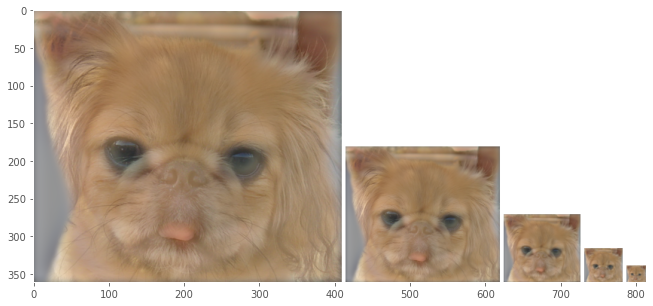

In [40]:
output = plot_Downsample(hybrid3_1[:,:,::-1])

- In this case too, the images closer to the front closely resemble Image2 (the dog).
- As we go further down the line, we can observe the shape of the cat emerging around the third sample (like before). 
- The fourth sample is almost completely identical to Image1 (the kitten). 
- Some prominent features of Image2 (like the tongue of the dog) can be made out if we dig deep like before but its overlapped with the nose of the cat so feature attribution is not lucid.

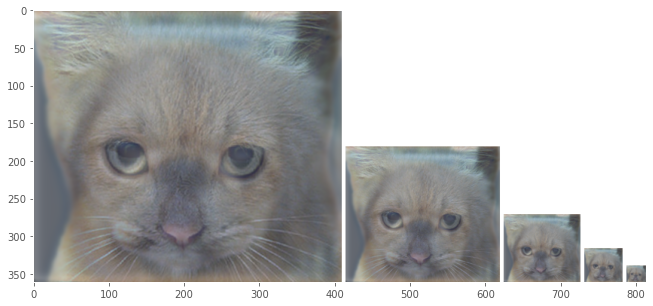

In [41]:
output = plot_Downsample(hybrid3_2[:,:,::-1])

- Images closer to the front closely resembles the kitten.
- But as we go further down the line, the shape of the dog emerges in the third sample. 
- The fourth sample is completely identical to the dog.

<h4 align=center> TEST CASE 4 </h4>

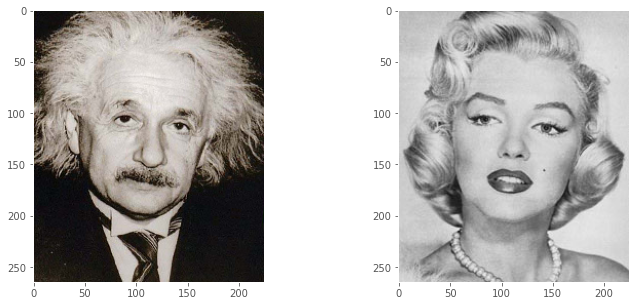

In [42]:
# Reading in the input for testcase 4
img4_1 = cv2.imread('./data/ex04/einstein.bmp')
img4_2 = cv2.imread('./data/ex04/marilyn.bmp')

plot_input(img4_1, img4_2)

Input image shapes

 -> Image 1 : (265, 225, 3)
 -> Image 2 : (265, 225, 3)

Output image shape : (265, 225, 3)

Generating the hybrid image...


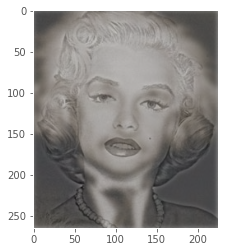

In [43]:
hybrid4_1 = gen_Hybrid(img4_1,img4_2, 3, 3)
plot_image(hybrid4_1)

- The hybrid of Image1 (Einstein) and Image2 (Marilyn Monroe) largely contains the finer details (higher frequency components) of Image2.
- But we can again observe some components of Image1 (like Einstein's tie and his blurred hair) in the background.

Input image shapes

 -> Image 1 : (265, 225, 3)
 -> Image 2 : (265, 225, 3)

Output image shape : (265, 225, 3)

Generating the hybrid image...


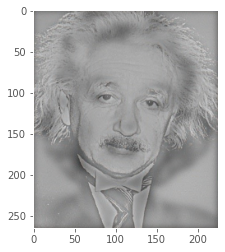

In [44]:
hybrid4_2 = gen_Hybrid(img4_2,img4_1, 4, 3)
plot_image(hybrid4_2)

- A similar pattern to before emerges again.
- But you can make out some blurred features of Marilyn (like her lips) in the background. But Einstein's features are predominant.

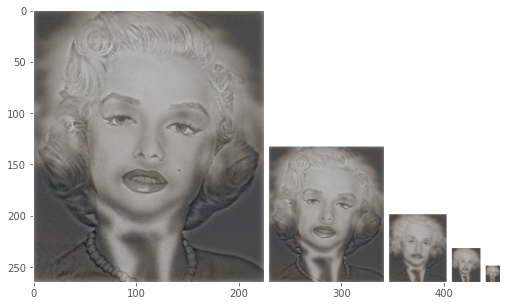

In [45]:
output = plot_Downsample(hybrid4_1[:,:,::-1])

- The images closer to the front closely resemble Image2 (Marilyn).
- As we go further down the line, we can observe the shape of Einstein emerging around the third sample (like before). 
- The fourth sample is almost completely identical to Image1. 
- Some prominent features like Marilyn's lips can be made out but its overlapped with Einstein's moustache so feature attribution is also not clear in this case.

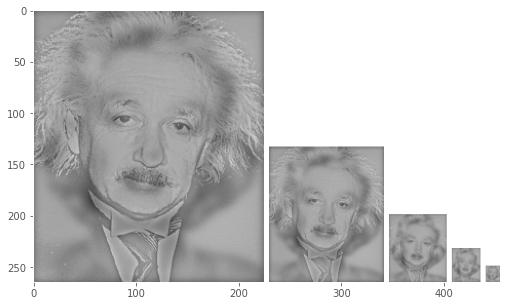

In [46]:
output = plot_Downsample(hybrid4_2[:,:,::-1])

- Images closer to the front closely resemble Einstein.
- But as we go further down the line, the shape of Marilyn emerges in the third sample. 
- The fourth sample is completely identical to Marilyn Monroe.

<h4 align=center> TEST CASE 5 </h4>

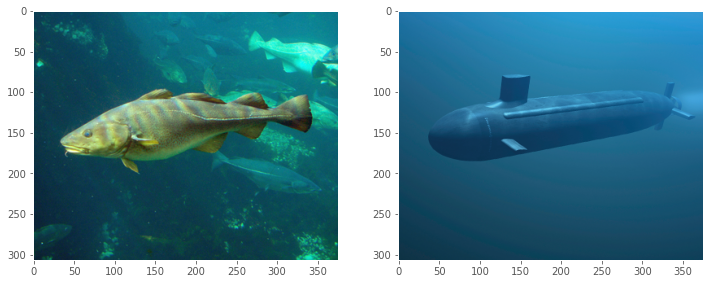

In [47]:
# Reading in the input for testcase 5
img5_1 = cv2.imread('./data/ex05/fish.bmp')
img5_2 = cv2.imread('./data/ex05/submarine.bmp')

plot_input(img5_1, img5_2)

Input image shapes

 -> Image 1 : (307, 375, 3)
 -> Image 2 : (307, 375, 3)

Output image shape : (307, 375, 3)

Generating the hybrid image...


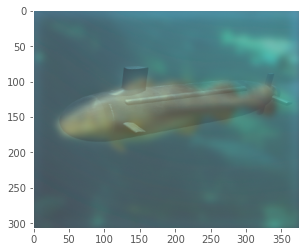

In [48]:
hybrid5_1 = gen_Hybrid(img5_1,img5_2, 5, 10)
plot_image(hybrid5_1)

- The hybrid of Image1 (the fish) and Image2 (The submarine) largely contains the finer details (higher frequency components) of Image2.
- But since the color of the submarine is identical to the water's, the features are not completely dominant. 
- We can again observe some components of Image1 (the fish's fins) in the background.

Input image shapes

 -> Image 1 : (307, 375, 3)
 -> Image 2 : (307, 375, 3)

Output image shape : (307, 375, 3)

Generating the hybrid image...


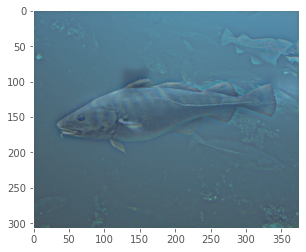

In [49]:
hybrid5_2 = gen_Hybrid(img5_2,img5_1, 4, 4)
plot_image(hybrid5_2)

- This image is much better compared to the one from before as the submarine cannot be made out that easily.
- But you can make out some blurred features of the submarine (like its sail) in the background. But the fish's features are predominant.

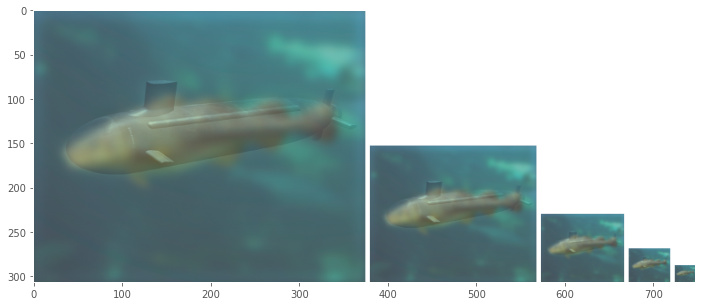

In [50]:
output = plot_Downsample(hybrid5_1[:,:,::-1])

- The images closer to the front closely resemble Image2 (the submarine).
- As we go further down the line, we can observe the shape of the fish emerging around the third sample (like before). 
- The fourth sample is completely identical to Image1 (the fish). 

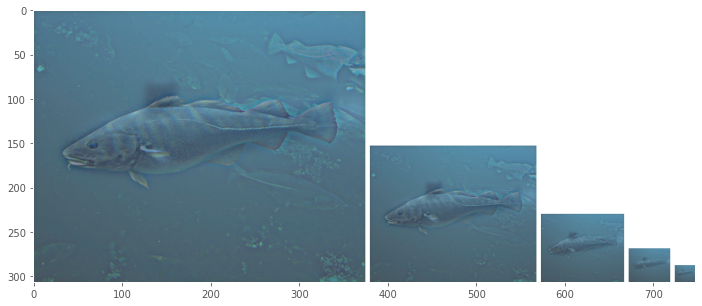

In [51]:
output = plot_Downsample(hybrid5_2[:,:,::-1])

- Images closer to the front closely resemble the fish.
- But as we go further down the line, the shape of the submarine emerges in the third sample. 
- The fourth sample is completely identical to Image2 (the submarine).

<h4 align=center> TEST CASE 6 </h4>

**NOTE :** For images whose shapes are not equal (test cases 6 and 7), I made the hybrid's size equal to the average of their shapes.
- I used the average shape because I felt that the average of input shapes was a good enough common ground for the inputs to generate the hybrid.
- I used `cv2.resize()` for resizing the input images to generate the hybrid image.
- Check the code for finer details.

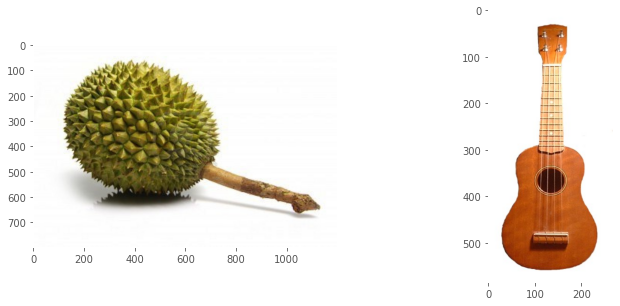

In [52]:
# Reading in the inputs for testcase 6
img6_1 = cv2.imread('./data/ex06/durian.jpg')
img6_2 = cv2.imread('./data/ex06/ukulele.jpg')

plot_input(img6_1, img6_2)

- You can see that the final output shape is the average of the inputs' shapes in the details printed below.

Input image shapes

 -> Image 1 : (798, 1200, 3)
 -> Image 2 : (584, 268, 3)

Output image shape : (691, 734, 3)

Generating the hybrid image...


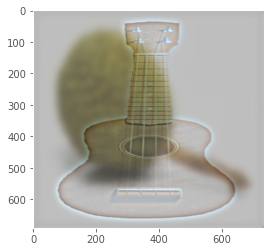

In [53]:
hybrid6_1 = gen_Hybrid(img6_1,img6_2, 12, 10)
plot_image(hybrid6_1)

- These images' predominant features are oriented in completely different directions, so the hybrid image generated is not proper like the ones before. 
- But you can make out the finer features of Image2 (the ukulele) and the coarse features of Image1 (the durian) in the hybrid.
- That is why while generating hybrids, it is desirable to select images whose predominant features are more or less aligned in the same direction (like the ones we used before).
- We could use some feature extraction technique like SIFT to make out the dominant feature orientations, rotate the images to orient their important features in a common desirable direction (for example, perpendicular would be desirable in this case). But this is outside the scope of this Assignment, so I am not implementing it.

Input image shapes

 -> Image 1 : (584, 268, 3)
 -> Image 2 : (798, 1200, 3)

Output image shape : (691, 734, 3)

Generating the hybrid image...


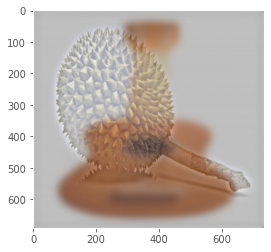

In [54]:
hybrid6_2 = gen_Hybrid(img6_2,img6_1, 12, 10)
plot_image(hybrid6_2)

- Like I explained before, these images' predominant features are oriented in completely different directions, so the hybrid image generated is similar to the above. 
- But like before, you can make out the finer features of Image1 (the durian)  and the coarse features of Image2 (the ukulele) in the hybrid.

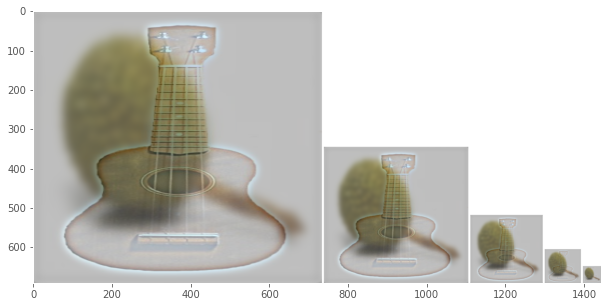

In [55]:
output = plot_Downsample(hybrid6_1[:,:,::-1])

- Similar to the cases before, the images closer to the front (the first and second images) contain the higher frequency components of Image2(the ukulele) and the lower frequency components of Image1 (the durian).
- The fourth sample is almost completely identical to Image1 as all the high frequencies of Image2 are filtered out.

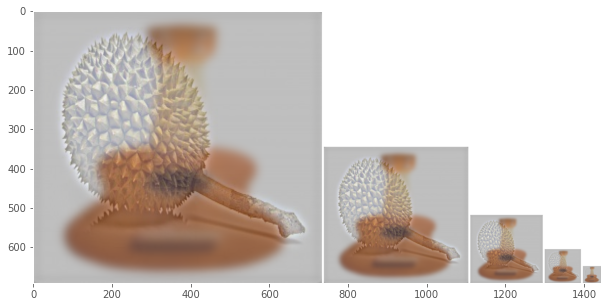

In [56]:
output = plot_Downsample(hybrid6_2[:,:,::-1])

- Sure enough, the images exhibit a similar pattern to the above.
- The images closer to the front contain the higher frequency components of Image1(the durian) and the lower frequency components of Image2 (the ukulele).
- The fourth sample is almost completely identical to Image2 as all the high frequencies of Image1 are filtered out.

<h4 align=center> TEST CASE 7 </h4>

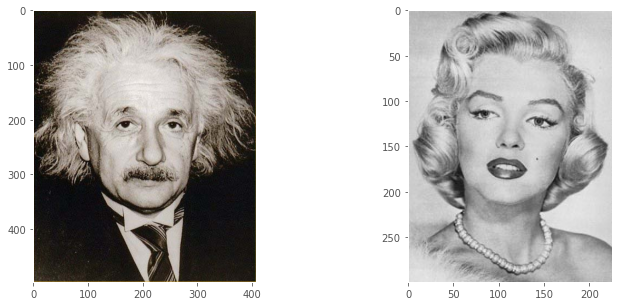

In [57]:
# Reading in the inputs for testcase 7
img7_1 = cv2.imread('./data/ex07/einstein.jpg')
img7_2 = cv2.imread('./data/ex07/marilyn.jpg')

plot_input(img7_1, img7_2)

- You can check that the final output shape is the average of the inputs' shapes in the details printed below.

Input image shapes

 -> Image 1 : (497, 407, 3)
 -> Image 2 : (300, 225, 3)

Output image shape : (398, 316, 3)

Generating the hybrid image...


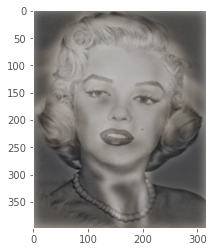

In [58]:
hybrid7_1 = gen_Hybrid(img7_1,img7_2, 5, 9)
plot_image(hybrid7_1)

- The hybrid of Image1 (Einstein) and Image2 (Marilyn Monroe) largely contains the finer details (higher frequency components) of Image2.
- But like before we can again observe some components of Image1 (like Einstein's tie and his blurred hair) in the background.

Input image shapes

 -> Image 1 : (300, 225, 3)
 -> Image 2 : (497, 407, 3)

Output image shape : (398, 316, 3)

Generating the hybrid image...


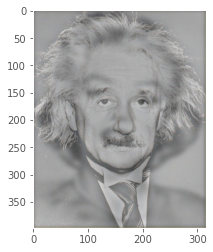

In [59]:
hybrid7_2 = gen_Hybrid(img7_2,img7_1, 4, 9)
plot_image(hybrid7_2)

- A similar pattern emerges again.
- But you can make out some blurred features of Marilyn (like her lips and hair) in the background. But Einstein's features are predominant.

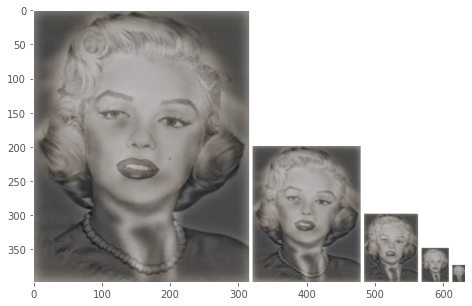

In [60]:
output = plot_Downsample(hybrid7_1[:,:,::-1])

- Like we saw before, the images closer to the front closely resemble Image2 (Marilyn).
- As we go further down the line, we can observe the features of Einstein emerging around the third sample (like before). 
- The fourth sample is almost completely identical to Image1. 
- Like before, some prominent features like Marilyn's lips can be made out but its overlapped with Einstein's moustache so feature attribution is also not clear in this case.

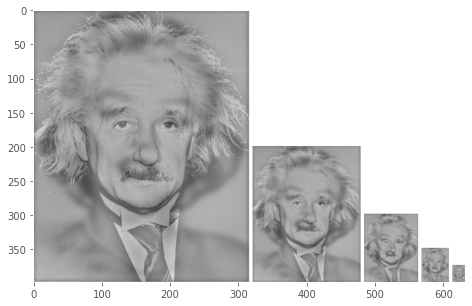

In [61]:
output = plot_Downsample(hybrid7_2[:,:,::-1])

- Like before, Images closer to the front closely resemble Einstein.
- As we go further down the line, the shape of Marilyn emerges in the third sample. 
- The fourth sample is completely identical to Marilyn Monroe.

<h3 align=center> SOME OBSERVATIONS  </h3>

**These are some off the observations I have made while studying the test cases :**
- Properly oriented input images (i.e. predominant features are centered close-by) and are of similar shape are desirable for producing hybrids.
- If images are not oriented properly, we use some feature extraction technique like SIFT to make out the dominant feature orientations, rotate the images to orient their important features in a common desirable direction (for example, perpendicular would be desirable in this case) before generating hybrids.
- This makes the hybrid much more visually pleasing. 
- Some images have very dominant features which mask the other image's features, so it is required to blur them with a very high $\sigma$. we could observe in the case of the bicycle and the bike. While generating the hybrid of the bicycle and the bike, the bicycle had very dominant features and I had to blur it heavily to allow the features of the bike to be more dominant. 
- Some images have very recessive features, so it is required to allow many of their features to pass during the highpass generation by allowing very few features to pass during the lowpass filtering(by setting $\sigma$ high) so that when we subtract from the lowpass output the image, most features are retained. 
- This effect could be observed when we took the hybrid of the fish and the submarine. The submarine had very recessive features, so I had to perform the above process for generating a visually pleasing hybrid.

<h1 align=center> R ADITHYA GOWTHAM </h1>
<h2 align=center> EE17B146 </h2>